# MODULES AND CONSTANTS

### MODULES, IMPORTS AND LIBRARIES

In [189]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mathematical imports
from math import sin

# Testing and validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_percentage_error, mean_squared_error, r2_score, root_mean_squared_error


# Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



### CONSTANTS

This are the functions to be generated
<br>
- $f1(x) = x · sin(x) + 2x $
<br>
- $f2(x) = 10 sin(x) + x^2$
<br>
- $f3(x) = sign(x)(x^2 + 300) + 20 sin(x)$

In [137]:
# Mathematical function and number generating function
FUNCTIONS = {   'f1':(lambda x: x*sin(x)+2*x), 
                'f2':(lambda x: 10*sin(x)+x**2), 
                'f3':(lambda x: (1 if x >= 0 else -1)*(x**2+300) + 20*sin(x))}

OTHER_FUNCTIONS = { 'sin(x)':(lambda x: sin(x)), 
                    'x*sin(x)' : (lambda x: x*sin(x)), 
                    'x**2':(lambda x : x**2), 
                    'sign(x)*x**2':(lambda x: x**2 if x>=0 else -x**2)}

# DATA GENERATION

generates the data for each function and returns a dataframe

In [124]:
def generateData(Xmin:int, Xmax:int, totN:int, functionsDict:dict=FUNCTIONS)->pd.DataFrame:
    x = np.linspace(Xmin, Xmax, totN)
    return pd.concat([  pd.Series(x, name='x'),
                        pd.DataFrame([[functionsDict[function](point) for function in functionsDict] for point in x], columns=functionsDict.keys())], 
                    axis=1)

adds the behavior of some non linear functions to x df for a better approximation of f(x)

In [125]:
def addOtherNonLinearFunction(df:pd.DataFrame, xMin:int, xMax:int, totN:int, functions:dict=OTHER_FUNCTIONS)->pd.DataFrame:
    return pd.concat([ df, pd.DataFrame([[functions[function](point) for function in functions] for point in np.linspace(xMin, xMax, totN)], columns=functions.keys())], 
                    axis=1)

# PLOT FUNCTIONS

Can either plot a single function or all functions at once <br>
Draw and inspect the shape of the function. Which regression model of those you know could achieve
better performance?

In [187]:
def plotFunction(x:pd.Series, y:pd.DataFrame|pd.Series, names:list[str]=None, title:str=None)->None:
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.set_title(title or 'functions')
    ax.plot(x, y)
    ax.legend(labels=names or y.columns)
    plt.show()

# REGRESSORS

Frame now a regression task to your generated data. Start from the ordinary least squares Linear
Regression. <br>

Fit each model to the training data and predict the function value for each test point

In [185]:
def testRegressor(df:pd.Series, xMin:int, xMax:int, totN:int, functionTested:str, 
                func, nonLinearFunc:dict=OTHER_FUNCTIONS)->None:
    xTest = np.linspace(xMin, xMax, totN)
    
    yPred = (LinearRegression(fit_intercept=True, n_jobs=-1)
            .fit(df[['x']+list(nonLinearFunc.keys())], np.reshape(df[functionTested], (-1, 1)))
            .predict(addOtherNonLinearFunction(pd.Series(xTest, name='x'), xMin, xMax, totN, OTHER_FUNCTIONS)))
    
    plotFunction(xTest, pd.concat([pd.Series(yPred[:, 0]), pd.Series(list(map(lambda x: func(x)+2, xTest)))],axis=1), 
                 names=['yTrue', 'yPred'], title='Predicted vs True')

Then, choose additional models which you believe could outperform linear regression to approximate the function.

<br> Info: There are many regression models in scikit-learn, other than the ones that you should already be familiar with (e.g. LinearRegression, Ridge, SVR). Part of the models that you adopted
for classification have their regression counterparts, such as MLPRegressor and RandomForestRegressor.
<br>


In [ ]:
def additionalRegressors():
    pass

# MAIN FUNCTION

### Main function of the program
it does:
<ol>
<li>The generation of the data</li>
<li>Plots the functions</li>
<li>Trains and builds the regression model, after adding other non linear functions for a better approximation</li>
</ol>

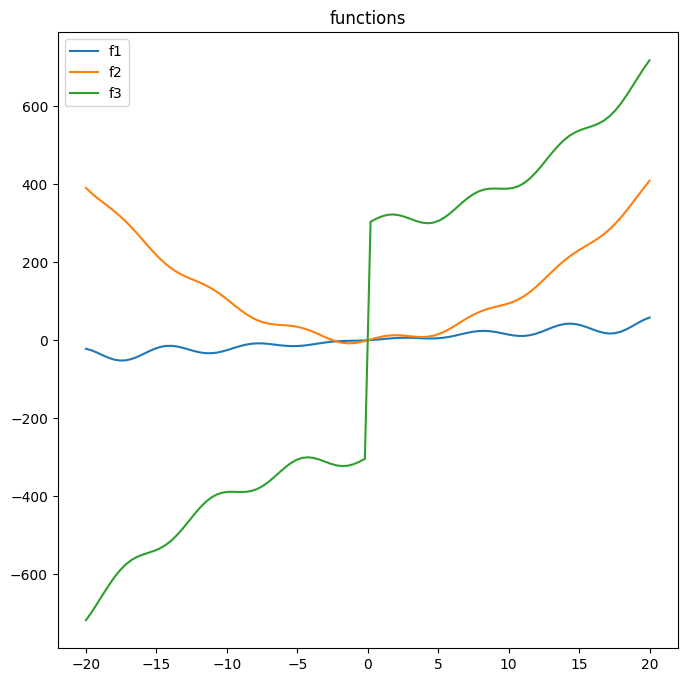

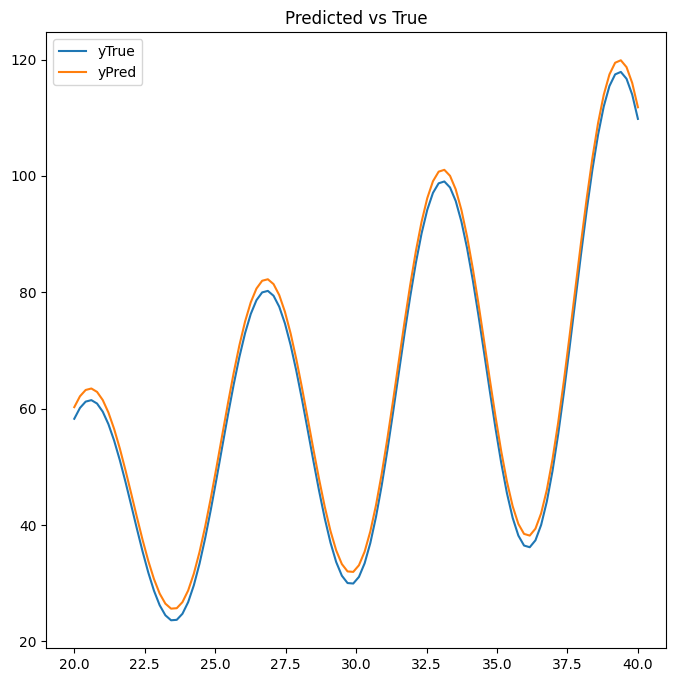

In [ ]:
def main()->None:
    df = generateData(-20, 20, 100, FUNCTIONS) # 1  
    
    plotFunction(df['x'], df[df.columns.difference(['x'])]) # 2    
    
    df = addOtherNonLinearFunction(df, -20, 20, 100, OTHER_FUNCTIONS)
    
    testRegressor(df, 20, 40, 100, 'f1', FUNCTIONS['f1'], OTHER_FUNCTIONS) # 3
    
    
    
    
main()